#Import Modules

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import numpy as np

#Load the MNIST dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Data Pre-Processing


In [ ]:
# Reshape the data to be in the format expected by the CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize the pixel values (to ease computation)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Defining the CNN model architecture


In [ ]:
# Define the CNN model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Train the model on the MNIST dataset

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1438 - accuracy: 0.9552 - val_loss: 0.0501 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0391 - val_accuracy: 0.9875
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0327 - val_accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0332 - val_accuracy: 0.9905
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0322 - val_accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.0341 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0432 - val_accura

In [ ]:
# Save the trained model to disk
model.save('mnist_cnn_model.h5')

In [ ]:

# Load the saved model from disk
loaded_model = keras.models.load_model('mnist_cnn_model.h5')

# Test the model on a test image

In [ ]:

# Test the loaded model on a test image
y_pred = model.predict(x_test)#model.predict() gives the prediction probability of each class for that data point
print(y_pred,y_pred.shape)

313/313 [==============================] - 1s 2ms/step
[[-17.83599     -4.992314    -2.6308503  ...  15.093204    -9.232985
    3.4270995 ]
 [  0.12745753  -0.7144497   26.031786   ...  -6.3871064   -2.7569008
  -13.900037  ]
 [ -1.0331783   11.2537985   -0.9966581  ...   1.4429672   -2.941598
   -7.315046  ]
 ...
 [-14.505506     1.1236973   -2.7346175  ...   1.3981853    2.447465
    6.991567  ]
 [ -9.822541   -14.614854   -12.043088   ... -10.686626     3.9948866
  -10.531884  ]
 [ -5.071366    -2.234521    -3.8181415  ... -20.176775    -4.693492
  -11.941027  ]] (10000, 10)


In [ ]:
# converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

7
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 9, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1

In [ ]:
#Accuracy on Test data:
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy score ',accuracy)
print(x_test.shape)

313/313 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9899
Accuracy score  0.9898999929428101
(10000, 28, 28, 1)


# Confusion matrix

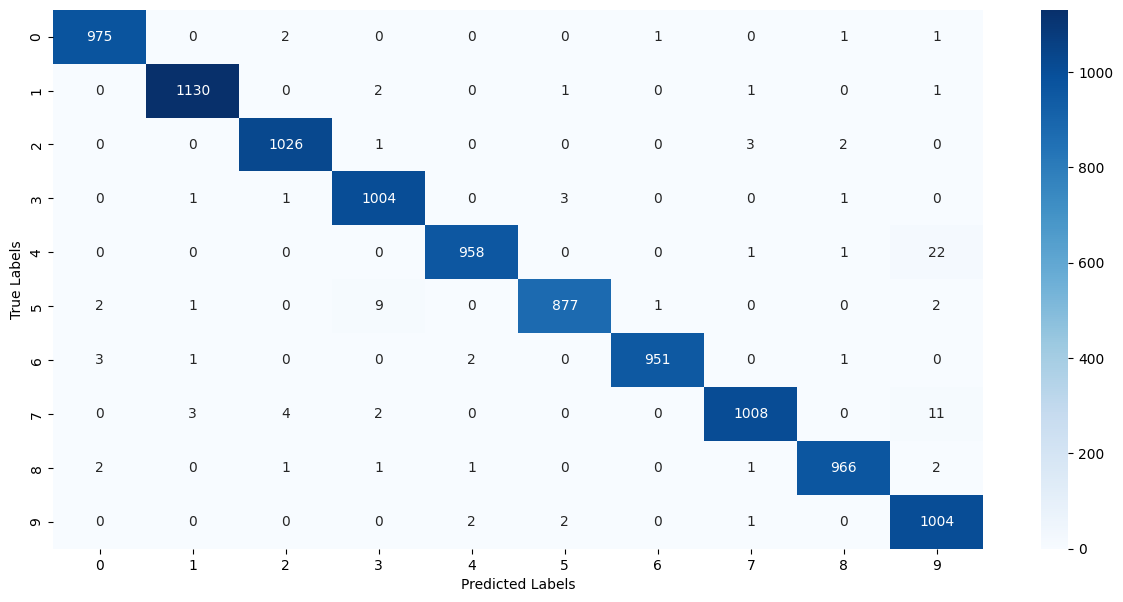

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Testing the model on a random image

1/1 [==============================] - 0s 67ms/step
True label 0
predicted label  0


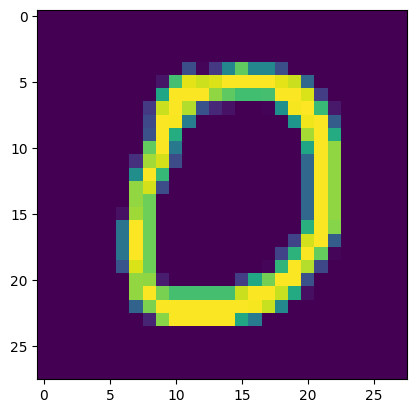

In [ ]:
test_image = x_test[10]
prediction = loaded_model.predict(np.array([test_image])) #model.predict() gives the prediction probability of each class for that data point
import cv2
plt.imshow(test_image)
print("True label",y_test[10])
print('predicted label ',np.argmax(prediction[0]))
